In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
pd.set_option('display.max_columns', 999)
%matplotlib inline

In [110]:
import requests

def download_file(url, save_as):
    # Send a GET request to the URL
    response = requests.get(url)
    
    # Open a new file with the specified name
    with open(save_as, "wb") as f:
        # Write the content of the response to the file
        f.write(response.content)
    print(f"File saved as {save_as}.")

In [111]:
data_url = "https://raw.githubusercontent.com/Md-Mahbub-Islam/MachineLearningTask1/main/bank-additional-full.csv"
download_file(data_url, "data.csv")

File saved as data.csv.


In [112]:
bank = pd.read_csv('data.csv', sep = ";")
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [113]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [114]:
bank.shape

(41188, 21)

In [115]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [116]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [117]:
bank.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [118]:
#filter out the numerical variables and categorical variables
num_colmuns = []
cat_columns = []
for name, type in dict(bank.dtypes).items():
        if type =='int64' or type == 'float64':
            num_colmuns.append(name)
        else:
            cat_columns.append(name)       

[Text(0, 0, 'age'),
 Text(0, 0, 'duration'),
 Text(0, 0, 'campaign'),
 Text(0, 0, 'pdays'),
 Text(0, 0, 'previous'),
 Text(0, 0, 'emp.var.rate'),
 Text(0, 0, 'cons.price.idx'),
 Text(0, 0, 'cons.conf.idx'),
 Text(0, 0, 'euribor3m'),
 Text(0, 0, 'nr.employed')]

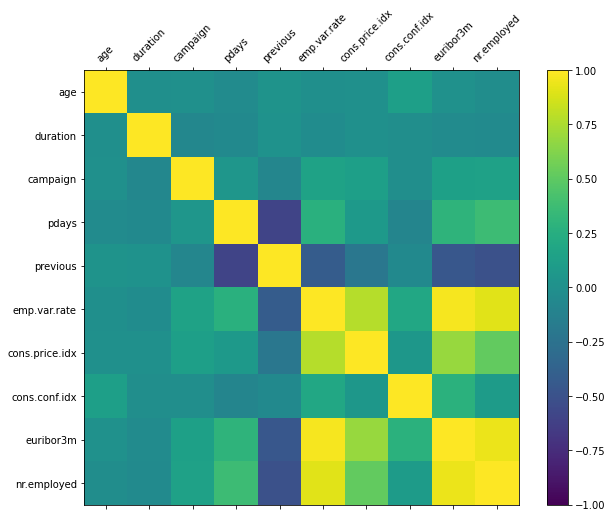

In [119]:
#fig.add_subplot(nrows, ncols, plot_number)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(bank.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(num_colmuns, rotation = 45)
ax.set_yticklabels(num_colmuns)

In [120]:
num_colmuns

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

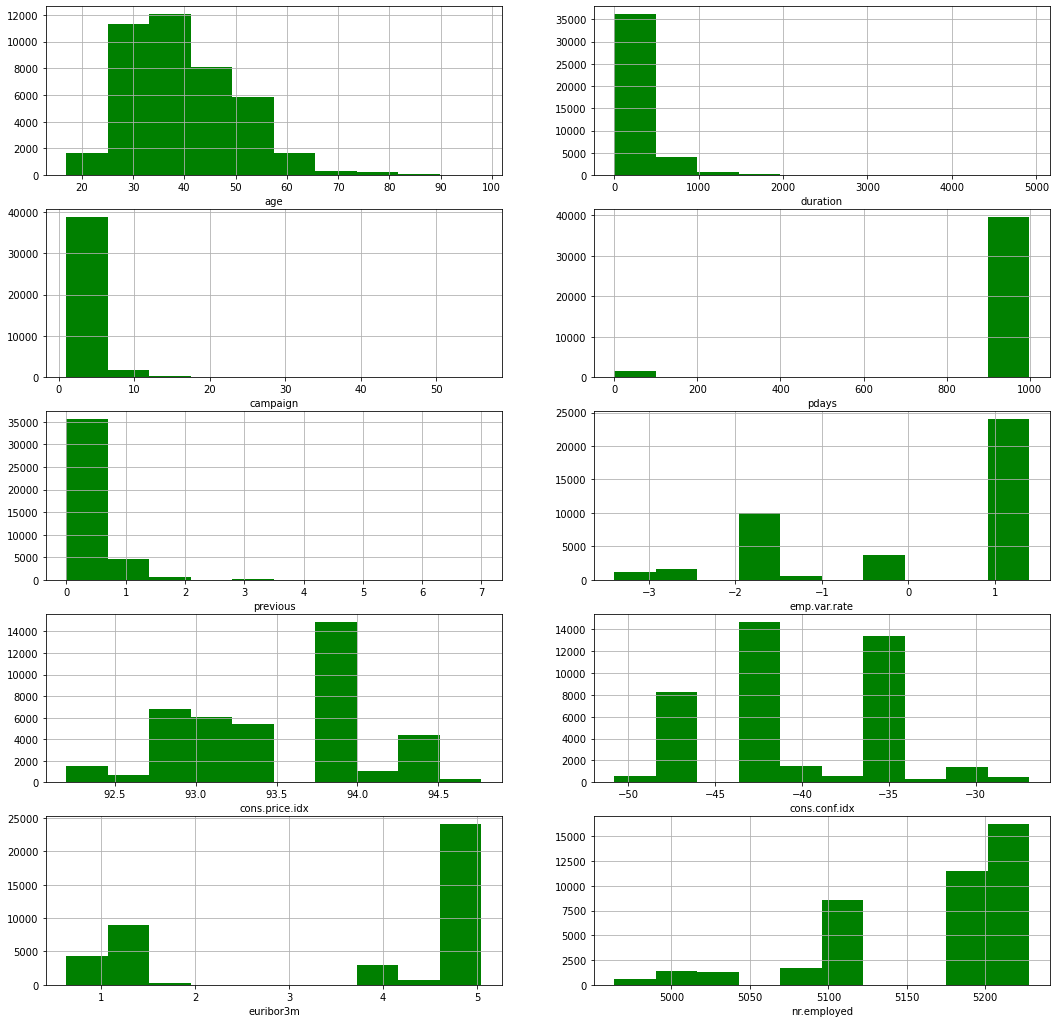

In [121]:
fig = plt.figure(figsize=(18,18))
for r in range(0,10):
    ax = fig.add_subplot(5,2,r+1)
    ax = bank[num_colmuns[r]].hist(color="green")
    ax.set_xlabel(num_colmuns[r])

In [122]:
cat_columns[0:10]

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

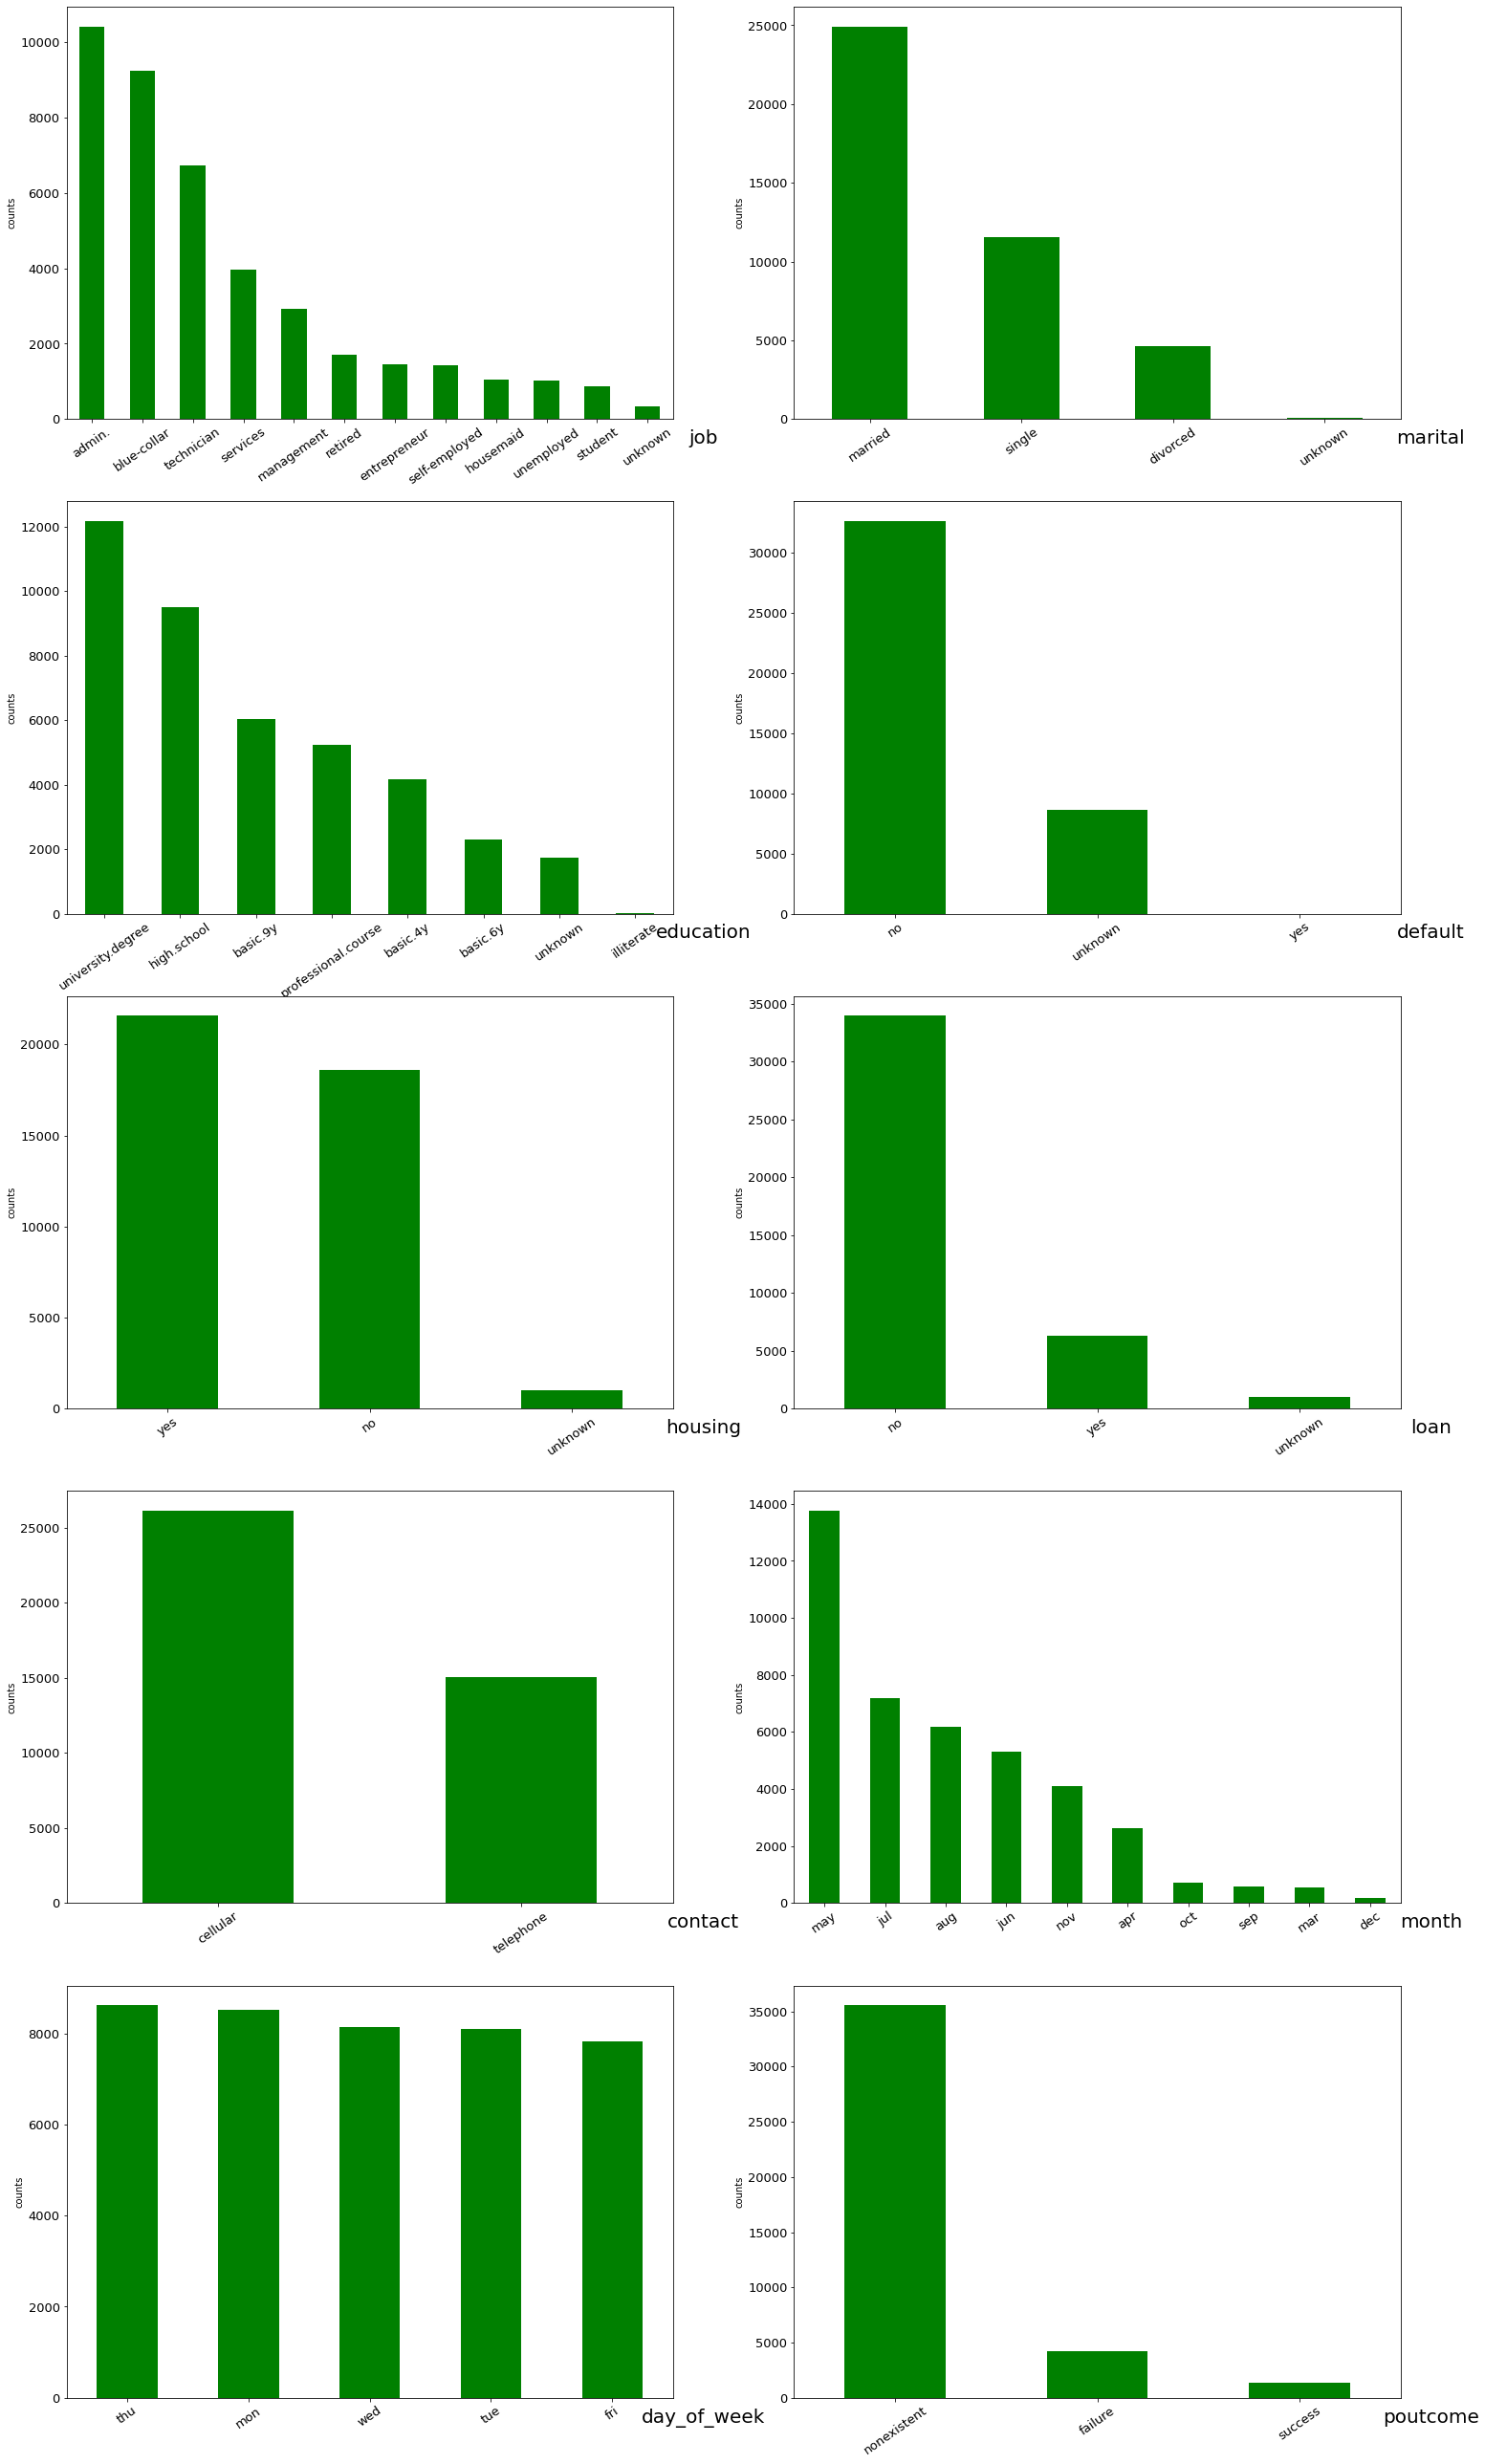

In [123]:
fig = plt.figure(figsize=(25,46))
for r in range(0,10):
    ax = fig.add_subplot(5,2,r+1)
    ax = bank[cat_columns[r]].value_counts().plot(kind = 'bar', rot=35, fontsize = 13, color="green")
    ax.set_xlabel(cat_columns[r],fontsize = 20)
    ax.xaxis.set_label_coords(1.05, -0.025)
    ax.set_ylabel('counts')

Text(0.5, 1.0, 'Percentage of each Term Deposit Status')

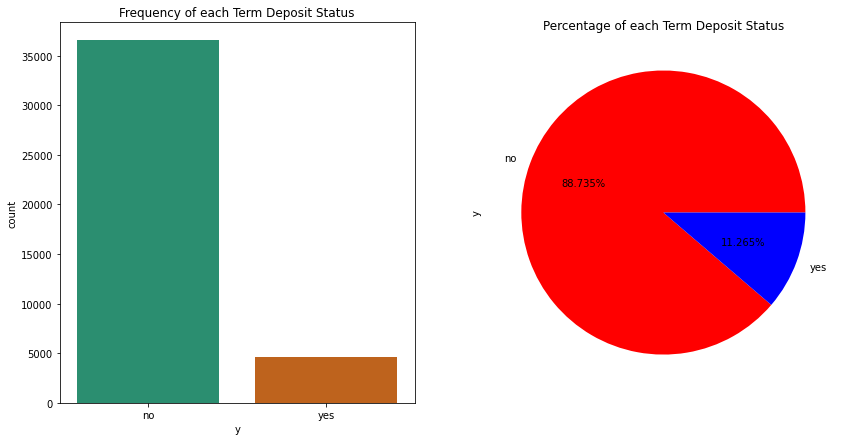

In [124]:
# Set figure size with matplotlib
fig, axs = plt.subplots(1,2,figsize=(14,7))
#create the frequency graph of Target variable deposit
sns.countplot(x='y',data=bank, ax=axs[0], palette="Dark2")
axs[0].set_title("Frequency of each Term Deposit Status")
#create the pie graph of Target variable deposit in term of percentage
bank.y.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.3f%%', colors=["red", "blue"])
axs[1].set_title("Percentage of each Term Deposit Status")

In [125]:
null_counts = bank.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [126]:
print("Data types and their frequency\n{}".format(bank.dtypes.value_counts()))

Data types and their frequency
object     11
int64       5
float64     5
dtype: int64


In [127]:
object_columns_df = bank.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

job              housemaid
marital            married
education         basic.4y
default                 no
housing                 no
loan                    no
contact          telephone
month                  may
day_of_week            mon
poutcome       nonexistent
y                       no
Name: 0, dtype: object


In [128]:
#we need to drop columns month and day_of_week
bank_prepared = bank.drop(['month', 'day_of_week'], axis = 1)

In [129]:
#y is Target Variable
cols = ['job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'poutcome']
for name in cols:
    print(name,':')
    print(bank_prepared[name].value_counts(),'\n')

job :
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 

marital :
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 

education :
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 

default :
no         32588
unknown     8597
yes            3
Name: default, dtype: int64 

housing :
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64 

loan :
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64 

contact :
cellular     26144
telephon

In [130]:
# We need to change everything to numbers so we can do machine learning on the data
#Nomial
Nominal = ['job','marital', 'default', 'housing', 'loan', 'contact', 'poutcome']
dummies = pd.get_dummies(bank[Nominal])

bank_prepared = pd.concat([bank_prepared, dummies],axis=1)
bank_prepared = bank_prepared.drop(Nominal, axis = 1)


#Ordinal
bank_prepared['education'] = bank_prepared['education'].replace(['basic.4y','basic.6y','basic.9y'], 'basic')

mapping_dict = {
    "education": {
        "university.degree": 5,
        "professional.course": 4,
        "basic": 3,
        "high.school": 2,
        "illiterate": 1,
        "unknown": 0
    }
}
bank_prepared = bank_prepared.replace(mapping_dict)

In [131]:
bank_prepared = bank_prepared.drop(['duration'], axis = 1) #removed since this columsn effect target variable


In [132]:
bank_prepared['y'] = bank_prepared['y'].map(dict(yes=1, no=0))
bank_prepared['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [133]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score,GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix,precision_score, recall_score, accuracy_score,classification_report,roc_curve,f1_score    
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.utils import resample
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion

In [134]:
validation_size = 0.20 # 20% test data
seed = 10
bank_train, bank_test = train_test_split(bank_prepared, test_size=validation_size, random_state=seed)

In [135]:
X_train = bank_train.drop(['y'], axis = 1)
Y_train = bank_train['y']
X_test = bank_test.drop(['y'], axis = 1)
Y_test = bank_test['y'] 

In [136]:
Y_train.value_counts(normalize = True)

0    0.887344
1    0.112656
Name: y, dtype: float64

In [137]:
Y_test.value_counts(normalize = True)

0    0.887351
1    0.112649
Name: y, dtype: float64

In [138]:
# Spot Check Algorithms
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Naive Bayes', GaussianNB()))
results = []
names = []
roc = []
for name, model in models:
    cv_results = cross_val_score(model, X_train.values, Y_train.values, cv = 10, scoring = 'accuracy')
    y_train_pred = cross_val_predict(model, X_train.values, Y_train.values, cv = 10)
    roc_results = cross_val_score(model, X_train.values, Y_train.values, cv=10, scoring = 'roc_auc')
    results.append(cv_results)
    names.append(name)
    roc.append(roc_results)
    print("{}\nAccuracy: {:.4f}({:.4f})".format(name, cv_results.mean(), cv_results.std()))
    print("Recall: {:.4f}".format(recall_score(Y_train.values, y_train_pred)))
    print("Precision: {:.4f}".format(precision_score(Y_train.values, y_train_pred)))
    print("ROC: {:.4f}".format(roc_results.mean()))
    print('confusition_matrix')
    print(confusion_matrix(Y_train.values, y_train_pred))
    print('------------------------------------------------')
    print("\n")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Logistic Regression
Accuracy: 0.9004(0.0027)
Recall: 0.1961
Precision: 0.7089
ROC: 0.7632
confusition_matrix
[[28939   299]
 [ 2984   728]]
------------------------------------------------


KNN
Accuracy: 0.8892(0.0035)
Recall: 0.2869
Precision: 0.5145
ROC: 0.7265
confusition_matrix
[[28233  1005]
 [ 2647  1065]]
------------------------------------------------


Decision Tree
Accuracy: 0.8395(0.0050)
Recall: 0.3446
Precision: 0.3088
ROC: 0.6232
confusition_matrix
[[26375  2863]
 [ 2433  1279]]
------------------------------------------------


Naive Bayes
Accuracy: 0.8223(0.0030)
Recall: 0.5081
Precision: 0.3189
ROC: 0.7604
confusition_matrix
[[25209  4029]
 [ 1826  1886]]
------------------------------------------------




In [139]:
X_train.columns

Index(['age', 'education', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [140]:
len(X_train.columns)

40

In [141]:
import numpy as np
from keras import models
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU, Dropout

In [148]:
from keras.optimizers import Adam
opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [143]:
# from keras.optimizers import SGD
# opt = SGD(lr=0.000001, momentum=0.9, decay=1e-6, nesterov=True)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [149]:
opt="rmsprop"

In [144]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

In [150]:
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=40))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='softmax'))

model.compile(optimizer=opt, 
              loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=32)

# Evaluate the model on the test set
score, accuracy = model.evaluate(X_test, Y_test)
print("Test accuracy:", accuracy)

Epoch 1/10
1030/1030 [==============================] - 3s 2ms/step - loss: 3.5536 - accuracy: 0.1127
Epoch 2/10
1030/1030 [==============================] - 2s 2ms/step - loss: 2.5772 - accuracy: 0.1127
Epoch 3/10
1030/1030 [==============================] - 2s 2ms/step - loss: 2.2401 - accuracy: 0.1127
Epoch 4/10
1030/1030 [==============================] - 2s 2ms/step - loss: 2.0152 - accuracy: 0.1127
Epoch 5/10
1030/1030 [==============================] - 2s 2ms/step - loss: 1.7952 - accuracy: 0.1127
Epoch 6/10
1030/1030 [==============================] - 2s 2ms/step - loss: 1.6456 - accuracy: 0.1127
Epoch 7/10
1030/1030 [==============================] - 2s 2ms/step - loss: 1.4642 - accuracy: 0.1127
Epoch 8/10
1030/1030 [==============================] - 2s 2ms/step - loss: 1.2469 - accuracy: 0.1127
Epoch 9/10
1030/1030 [==============================] - 2s 2ms/step - loss: 0.9411 - accuracy: 0.1127
Epoch 10/10
258/258 [==============================] - 1s 2ms/step - loss: 0.4027 

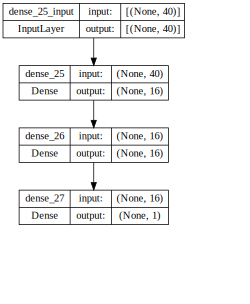

In [151]:
SVG(model_to_dot(model, show_shapes=True).create(prog="dot", format="svg"))

In [152]:

model = Sequential()
model.add(Dense(16, activation='relu', input_dim=40))
model.add(Dropout(.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1, activation='softmax'))

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=32)

# Evaluate the model on the test set
score, accuracy = model.evaluate(X_test, Y_test)
print("Test accuracy:", accuracy)

Epoch 1/10
1030/1030 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1127
Epoch 2/10
1030/1030 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1127
Epoch 3/10
1030/1030 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1127
Epoch 4/10
1030/1030 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1127
Epoch 5/10
1030/1030 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1127
Epoch 6/10
1030/1030 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1127
Epoch 7/10
1030/1030 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1127
Epoch 8/10
1030/1030 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1127
Epoch 9/10
1030/1030 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1127
Epoch 10/10
258/258 [=========================

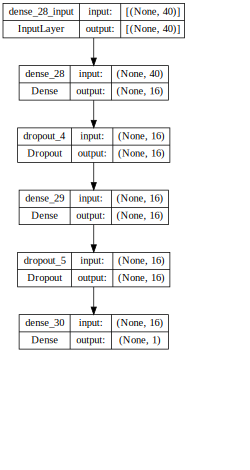

In [153]:
SVG(model_to_dot(model, show_shapes=True).create(prog="dot", format="svg"))